<a href="https://colab.research.google.com/github/IvanKatorgin/Deep-Learning/blob/main/Deep_Learning_%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Курс "Deep Learning". Домашнее задание 1. Основы нейронных сетей. Каторгин И.П.

## Задание

Реализуйте обучение нейронной сети из одного нейрона для задачи предсказания стоимости квартир boston house prices (https://www.kaggle.com/datasets/vikrishnan/boston-house-prices) или california housing prices (https://www.kaggle.com/datasets/camnugent/california-housing-prices?resource=download&select=housing.csv) с использованием pytorch.

Инструкция к выполнению задания:
1. Загрузите и подготовьте данные
2. Разделите данные на test и train
3. Создать модель (объект) класса. Для создания объекта можно использовать класс Sequential
4. Обучите модель на train данных
5. Проверьте качество модели на тестовых данных

## Загрузите и подготовьте данные

In [28]:
# загрузим необходимые библиотеки
import pandas as pd, numpy as np, sklearn, sklearn.metrics, sklearn.model_selection, sklearn.linear_model, sklearn.ensemble, matplotlib.pyplot as plt, seaborn as sns

In [36]:
import torch
from torch import autograd

In [6]:
# загрузим данные из файла
data = pd.read_csv('housing.csv')

In [7]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
# gосмотрим на пропуски
data.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [11]:
nulls_in_column_total_bedrooms = data[data['total_bedrooms'].isna()]
nulls_in_column_total_bedrooms

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [12]:
# посмотим на строки, где longitude равен -122.16
df = data[data['longitude'] == -122.16]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
283,-122.16,37.79,22.0,12842.0,2048.0,4985.0,1967.0,5.9849,371000.0,NEAR BAY
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
291,-122.16,37.77,48.0,977.0,194.0,446.0,180.0,4.7708,156300.0,NEAR BAY
292,-122.16,37.77,45.0,2324.0,397.0,968.0,384.0,3.5739,176000.0,NEAR BAY
293,-122.16,37.77,39.0,1583.0,349.0,857.0,316.0,3.0958,145800.0,NEAR BAY
351,-122.16,37.76,45.0,2299.0,514.0,1437.0,484.0,2.5122,95500.0,NEAR BAY
352,-122.16,37.75,38.0,2457.0,624.0,1516.0,482.0,1.5625,91700.0,NEAR BAY
355,-122.16,37.76,46.0,1827.0,307.0,881.0,302.0,4.6696,164300.0,NEAR BAY
356,-122.16,37.76,36.0,2781.0,574.0,1438.0,519.0,2.4598,155500.0,NEAR BAY
368,-122.16,37.75,46.0,954.0,161.0,429.0,154.0,2.9250,142900.0,NEAR BAY


Вывод: пропуски в столбце 'total_bedrooms' в разных объектах недвижимости и заполнить их средними значениями или соседними не представляется возможным. Единственный способ работы с пропусками в данном случае - удалить строки с пропусками

In [13]:
# удалим пропуски
data = data.dropna()
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [14]:
data.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


Посмотрим на выбросы данных

In [15]:
data['longitude'].value_counts()

,count
longitude,
-118.31,159
-118.30,157
-118.29,146
-118.32,141
-118.27,141
...,...
-123.25,1
-115.88,1
-116.27,1


In [16]:
data['latitude'].value_counts()

,count
latitude,
34.06,241
34.08,232
34.05,229
34.07,227
34.04,215
...,...
41.28,1
35.86,1
35.85,1


In [17]:
data['housing_median_age'].value_counts()

,count
housing_median_age,
52.0,1265
36.0,856
35.0,818
16.0,762
17.0,694
34.0,682
26.0,611
33.0,609
25.0,562


In [18]:
data['total_rooms'].value_counts()

,count
total_rooms,
1527.0,18
1613.0,17
1582.0,17
2127.0,16
1703.0,15
...,...
15018.0,1
10509.0,1
4988.0,1


In [19]:
data['total_bedrooms'].value_counts()

,count
total_bedrooms,
280.0,55
331.0,51
345.0,50
343.0,49
393.0,49
...,...
2009.0,1
2249.0,1
3114.0,1


In [20]:
data['median_income'].value_counts()

,count
median_income,
3.1250,49
15.0001,48
2.8750,46
4.1250,44
2.6250,44
...,...
1.8413,1
2.0800,1
1.3375,1


In [21]:
data['median_house_value'].value_counts()

,count
median_house_value,
500001.0,958
137500.0,119
162500.0,116
112500.0,103
187500.0,92
...,...
321700.0,1
300800.0,1
393100.0,1


In [22]:
data['population'].value_counts()

,count
population,
891.0,25
850.0,24
1052.0,24
1227.0,24
761.0,24
...,...
2116.0,1
5087.0,1
2811.0,1


In [23]:
data['households'].value_counts()

,count
households,
306.0,57
335.0,56
282.0,55
386.0,55
429.0,54
...,...
2826.0,1
1639.0,1
1630.0,1


In [24]:
data['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


In [26]:
# посроим несколько бокслотов
def get_boxplot(X, columns=[]):
  for i in columns:
    fig, axes = plt.subplots(1, 1, figsize=(8, 2))
    sns.boxplot(x=X[i])

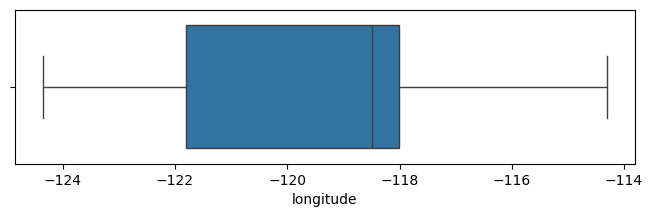

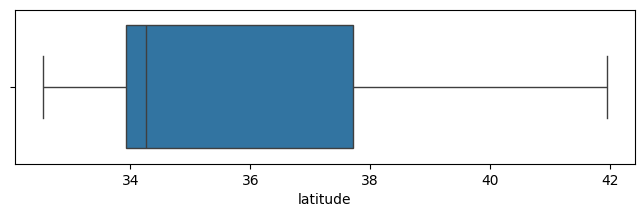

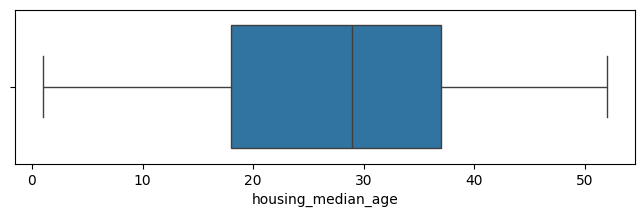

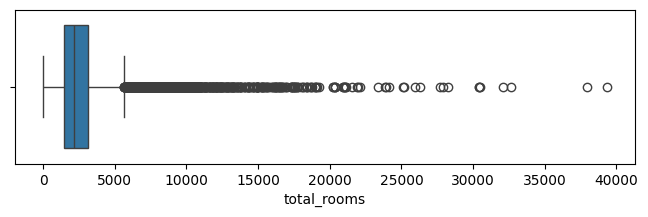

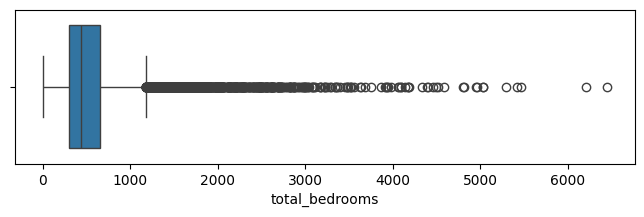

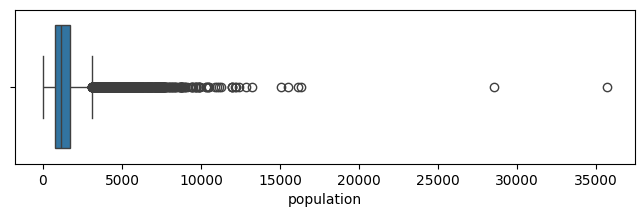

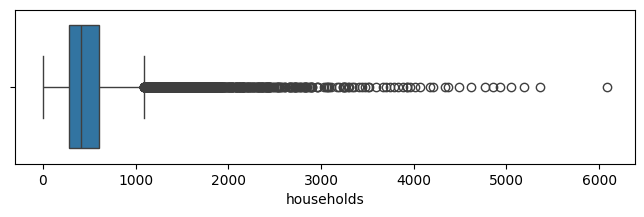

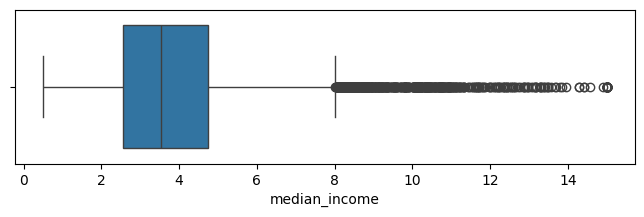

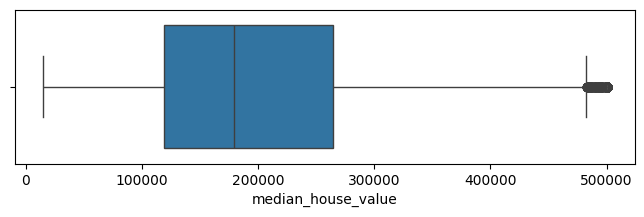

In [29]:
get_boxplot(data, ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value'])

In [31]:
# посмотрим на значения столбца total_rooms больше 35000
data[data['total_rooms'] > 35000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10309,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0,<1H OCEAN
13139,-121.44,38.43,3.0,39320.0,6210.0,16305.0,5358.0,4.9516,153700.0,INLAND


In [32]:
# посмотрим на значения столбца total_bedrooms больше 6000
data[data['total_bedrooms'] > 6000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9880,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0,<1H OCEAN
13139,-121.44,38.43,3.0,39320.0,6210.0,16305.0,5358.0,4.9516,153700.0,INLAND


In [33]:
# посмотрим на значения столбца population больше 25000
data[data['population'] > 25000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9880,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0,<1H OCEAN
15360,-117.42,33.35,14.0,25135.0,4819.0,35682.0,4769.0,2.5729,134400.0,<1H OCEAN


In [34]:
# посмотрим на значения столбца households больше 6000
data[data['households'] > 6000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9880,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0,<1H OCEAN


Судя по боксплотам - это выбросы. Удалим их

In [35]:
# удалим эти строки
data = data[(data['total_rooms'] < 35000) & (data['total_bedrooms'] < 6000) & (data['population'] < 25000) & (data['households'] < 6000)]
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20429 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20429 non-null  float64
 1   latitude            20429 non-null  float64
 2   housing_median_age  20429 non-null  float64
 3   total_rooms         20429 non-null  float64
 4   total_bedrooms      20429 non-null  float64
 5   population          20429 non-null  float64
 6   households          20429 non-null  float64
 7   median_income       20429 non-null  float64
 8   median_house_value  20429 non-null  float64
 9   ocean_proximity     20429 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [43]:
# удалим ненужные столбцы
data = data.drop(['longitude', 'latitude', 'ocean_proximity'], axis=1)
data

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


Датасет готов к дальнейшей работе

## Разделите данные на test и train

In [158]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, random_split, DataLoader

In [159]:
# 1. Подготовка данных
X = torch.tensor(data.drop('median_house_value', axis=1).values, dtype=torch.float32)
y = torch.tensor(data['median_house_value'].values, dtype=torch.float32)

In [160]:
# 2. Нормализация данных
X_mean = X.mean(dim=0)
X_std = X.std(dim=0)
X = (X - X_mean) / X_std

# Нормализация целевой переменной
y_mean = y.mean()
y_std = y.std()
y = (y - y_mean) / y_std

In [161]:
# 3. Разделение данных
dataset = TensorDataset(X, y)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
# фиксируем случайность
torch.manual_seed(42)
# Разделяем случайным образом
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [162]:
# 4. DataLoader для батчей
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

## Создать модель (объект) класса

Для создания объекта можно использовать класс Sequential

In [163]:
# 5. Модель
input_dim = X.shape[1]  # Автоматическое определение количества признаков
model = nn.Sequential(nn.Linear(input_dim, 1))

In [164]:
# 6. Функция потерь и оптимизатор
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Увеличил learning rate для нормализованных данных

## Обучите модель на train данных

In [165]:
# 7. Обучение
num_epochs = 100
for epoch in range(num_epochs):
    model.train()  # Режим обучения
    for batch_X, batch_y in train_loader:
        # Forward pass
        outputs = model(batch_X).squeeze()
        loss = criterion(outputs, batch_y)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Валидация
    model.eval()  # Режим оценки
    with torch.no_grad():
        test_preds = model(X[test_dataset.indices]).squeeze()
        test_loss = criterion(test_preds, y[test_dataset.indices])

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {loss.item():.4f}, '
              f'Test Loss: {test_loss.item():.4f}')

Epoch [10/100], Train Loss: 0.6379, Test Loss: 0.4082
Epoch [20/100], Train Loss: 0.2890, Test Loss: 0.4070
Epoch [30/100], Train Loss: 0.8041, Test Loss: 0.4093
Epoch [40/100], Train Loss: 0.4404, Test Loss: 0.4083
Epoch [50/100], Train Loss: 0.4107, Test Loss: 0.4073
Epoch [60/100], Train Loss: 0.2429, Test Loss: 0.4071
Epoch [70/100], Train Loss: 0.5371, Test Loss: 0.4072
Epoch [80/100], Train Loss: 0.3646, Test Loss: 0.4071
Epoch [90/100], Train Loss: 0.5295, Test Loss: 0.4100
Epoch [100/100], Train Loss: 0.5394, Test Loss: 0.4090


In [166]:
# 8. Возвращаем предсказания в исходный масштаб
def predict_denormalized(X_new):
    X_new = (torch.tensor(X_new, dtype=torch.float32) - X_mean) / X_std
    with torch.no_grad():
        pred_normalized = model(X_new).squeeze()
    return pred_normalized * y_std + y_mean

## Проверьте качество модели на тестовых данных

In [167]:
# 9. Проверка весов
print("\nОбученные веса:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")


Обученные веса:
0.weight: tensor([[ 0.2319, -0.3559,  0.3636, -0.3845,  0.4360,  0.7722]])
0.bias: tensor([-0.0114])


In [168]:
# 10. Пример предсказания (с возвратом в исходный масштаб)
sample_input = X[0:1]  # Берем первый образец
pred = predict_denormalized(sample_input)
print(f"\nПример предсказания: {pred.item():.2f} (реальное значение: {y[0].item() * y_std + y_mean:.2f})")


Пример предсказания: 62747.95 (реальное значение: 452600.00)


<ipython-input-166-9b6de5025a54>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_new = (torch.tensor(X_new, dtype=torch.float32) - X_mean) / X_std


In [170]:
# 11. Проверка на тестовом наборе
model.eval()
with torch.no_grad():
    test_preds = torch.cat([model(batch_X).squeeze() for batch_X, _ in test_loader])
    test_labels = torch.cat([batch_y for _, batch_y in test_loader])
    final_loss = criterion(test_preds, test_labels)
    print(f"Финальная ошибка на тесте: {final_loss.item():.4f}")

Финальная ошибка на тесте: 0.4090


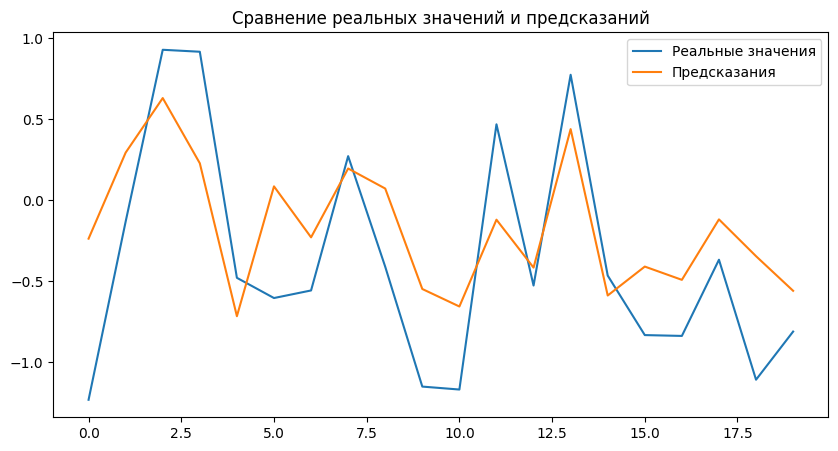

In [171]:
# Визуализация первых 20 предсказаний
plt.figure(figsize=(10, 5))
plt.plot(test_labels[:20].numpy(), label='Реальные значения')
plt.plot(test_preds[:20].numpy(), label='Предсказания')
plt.legend()
plt.title("Сравнение реальных значений и предсказаний")
plt.show()

Text(0, 0.5, 'Predictions')

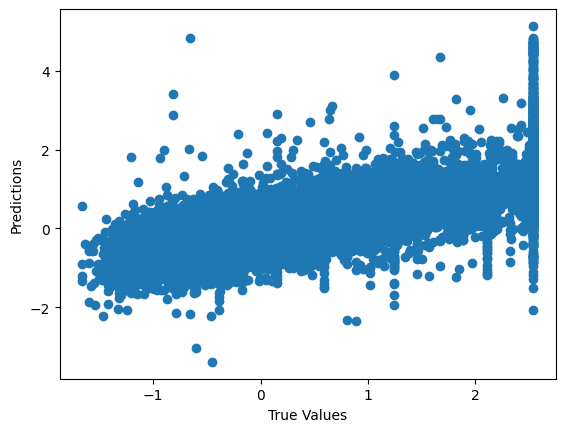

In [172]:
# визуализируем данные
plt.scatter(y.numpy(), model(X).detach().numpy())
plt.xlabel("True Values")
plt.ylabel("Predictions")

Выводы:

Реализовано обучение нейронной сети из одного нейрона для задачи предсказания стоимости квартир с использованием pytorch. Финальная ошибка на тестовых данных составила 0.4090